In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [6]:
df = pd.read_csv('modified_c4_epa_air_quality.csv')
df.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [8]:
df.shape

(260, 8)

<Axes: >

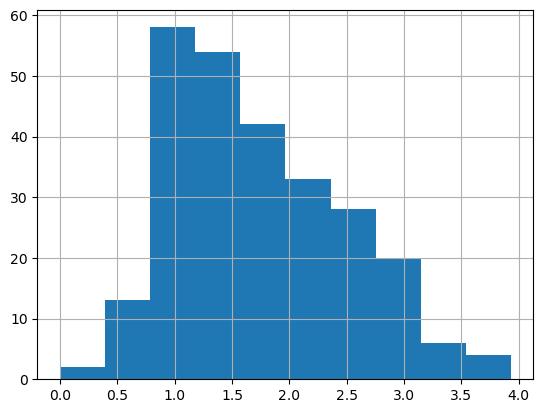

In [9]:
df['aqi_log'].hist()


In [10]:
# Define variable for aqi_log mean.
mean_aqi_log = df['aqi_log'].mean()
mean_aqi_log



1.7669210929985577

In [11]:
# Define variable for aqi_log standard deviation.
std_aqi_log = df['aqi_log'].std()
std_aqi_log


0.7147155520223724

In [14]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation below the mean.

upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.

((df['aqi_log']>= lower_limit)  & (df['aqi_log'] <= upper_limit)).mean()

0.7615384615384615

In [15]:
# Define variable for lower limit, 2 standard deviation below the mean.
lower_limit2 = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 1 standard deviation below the mean.

upper_limit2 = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.

((df['aqi_log']>= lower_limit2)  & (df['aqi_log'] <= upper_limit2)).mean()

0.9576923076923077

In [16]:
# Define variable for lower limit, 3 standard deviation below the mean.
lower_limit3 = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 1 standard deviation below the mean.

upper_limit3 = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.

((df['aqi_log']>= lower_limit3)  & (df['aqi_log'] <= upper_limit3)).mean()

0.9961538461538462

In [17]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

df['Z_SCORE'] = stats.zscore(df['aqi_log'])


# Display the first 5 rows to ensure that the new column was added.
df.head()


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z_SCORE
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [19]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean


df[(df['Z_SCORE']>3)|(df['Z_SCORE'] <-3)]


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z_SCORE
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886
